# Baby step into Python

## Basic math

the `func:print` to get the output

In [1]:
print(2 + 4)
print(8.1 - 5)

6
3.0999999999999996


Multiplication 

In [2]:
print(5 * 4)
print(3.1 * 2)

20
6.2


Division is almost as straightforward, but we have to remember that integer division is not the same as float division. Let us consider float division first.

In [ ]:
print(4.0 / 2.0)
print(1.0 / 3.1)

Now, consider the integer versions:

In [3]:
print(4 / 2)
print(1 / 3)

2.0
0.3333333333333333


In Python3 division now is automatically float division. You can do integer division with the `//` operator like this.

In [4]:
print(4 // 2)
print(1 // 3)

2
0


Exponentiation is also a basic math operation that python supports directly.

In [5]:
print(3.**2)
print(3**2)
print(2**0.5)

9.0
9
1.4142135623730951


## Advanced mathematical operators

The primary library we will consider is `mod:numpy`, which provides many mathematical functions, statistics as well as support for linear algebra.

In [6]:
import numpy as np
print(np.sqrt(2))

1.4142135623730951


### Exponential and logarithmic functions

In [7]:
print(np.exp(1))

2.718281828459045


There are two logarithmic functions commonly used, the natural log function `func:numpy.log` and the base10 logarithm `func:numpy.log10`.

In [8]:
print(np.log(10))
print(np.log10(10)) # base10

2.302585092994046
1.0


## Creating your own functions

We can combine operations to evaluate complex equations. Consider the value of the equation $x^3 - \log{(x)}$ for the value $x=4.1$

In [9]:
x = 3
print(x**3 - np.log(x))

25.90138771133189


how to express this equation as a new function, which we can call with different values.

In [10]:
def f(x):
    return x**3 - np.log(x)

print(f(3))
print(f(5.1))

25.90138771133189
131.0217594602697


## Defining functions in python 

In [11]:
def f(x):
    'return the inverse square of x'
    return 1.0/x**2

print(f(3))
print(f([4,5]))

0.1111111111111111


TypeError: unsupported operand type(s) for ** or pow(): 'list' and 'int'

Note that functions are not automatically vectorized. That is why we see the error above. There are a few ways to achieve that. One is to "cast" the input variables to objects that support vectorized operations, such as numpy.array objects.

In [12]:
def f(x):
    'return the inverse square of x'
    x = np.array(x)
    return 1.0/x**2

print(f(3))
print(f([4,5]))

0.1111111111111111
[0.0625 0.04  ]


It is possible to have more than one variable.

In [13]:
def func(x, y):
    'return product of x and y'
    return x *y

print(func(2, 3))
print(func(np.array([2, 3]), np.array([3, 4])))

6
[ 6 12]


You can define "`lambda`" functions, which are also known as inline or anonymous functions. The syntax is lambda `var:f(var)`. I think these are hard to read and discourage their use. Here is a typical usage where you have to define a simple function that is passed to another function, e.g `scipy.integrate.quad` to perform an integral.

In [14]:
from scipy.integrate import quad

def integrand(x):
    return x**3

result, error = quad(integrand, 0, 3)
print(result, error)

20.249999999999996 2.2482016248659415e-13


In [15]:
integrand_lambda = lambda x:x**3
result, error = quad(integrand_lambda, 0, 3)
print(result, error)

20.249999999999996 2.2482016248659415e-13


It is possible to nest functions inside of functions like this.

In [16]:
def wrapper(x):
    a = 4
    def func(x,a):
        return a*x
    return func(x,a)

wrapper(4)

16

An alternative approach is to "wrap" a function, say to fix a parameter. You might do this so you can integrate the wrapped function, which depends on only a single variable, whereas the original function depends on two variables.

In [17]:
def func(x, a):
    return a * x

def wrapper(x):
    a = 4
    return func(x, a)

print(wrapper(4))

16


In [18]:
def func(a, n=2):
    'compute the nth power of a'
    return a*n

# three different ways to call the function
print(func(2))
print(func(2, 3))
print(func(2, n=4))

4
6
8


In [19]:
def func(a=1, n=2):
    'compute the nth power of a'
    return a*n

# three different ways to call the function
print(func())
print(func(2, 4))
print(func(n=4, a=2))

2
8
8


Last example, defining a function for an ODE

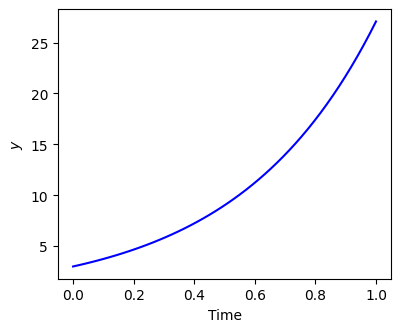

In [20]:
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt

k = 2.2
def myode(y,t):
    'ODE defining exponential growth'
    return k*y

y0 = 3
tspan = np.linspace(0,1)
y = odeint(myode, y0, tspan)

fig = plt.figure(figsize=(4.3, 3.5))

plt.plot(tspan, y, color='blue', ls='-')
plt.xlabel('Time')
plt.ylabel(r'$y$')

#fig.savefig('./funcs-ode.png', dpi=600)

plt.show()

## `lambda`

In [ ]:
f = lambda x: 2*x
print(f)
print(f(2))

We can have more than one argument:

In [ ]:
f = lambda x,y: x + y
print(f)
print(f(2, 3))

In [ ]:
f = lambda x, y=3: x + y
print(f)
print(f(2))
print(f(4, 1))

### Applications of lambda functions

For example, say you want to solve the nonlinear equation $\sqrt{x}=2.5$

In [ ]:
from scipy.optimize import fsolve
import numpy as np

sol, = fsolve(lambda x: 2.5 - np.sqrt(x), 8)
print(sol)

Another time to use lambda functions is if you want to set a particular value of a parameter in a function. Say we have a function with an independent variable, $x$ and a parameter a, i.e. $f(x; a)$. If we want to find a solution $f(x; a) = 0$ for some value of a, we can use a lambda function to make a function of the single variable $x$. Here is a example.

In [ ]:
from scipy.optimize import fsolve
import numpy as np

def func(x, a):
    return a * np.sqrt(x) - 4.0

sol, = fsolve(lambda x: func(x, 3.2), 3)
print(sol)

We can evaluate the integral $\int^{2}_{x=0} x^2 dx$ with a lambda function.

In [ ]:
from scipy.integrate import quad

print(quad(lambda x: x**2, 0, 2))

## Creating arrays in python

Here are examples of doing that to get the vectors as the columns.

In [ ]:
import numpy as np

a = np.array([1, 2, 3])
b = np.array([4, 5, 6])

print(np.column_stack([a, b]))
print('')
# this means stack the arrays vertically, e.g. on top of each other
print(np.vstack([a, b]).T)

Or rows:

In [ ]:
import numpy as np

a = np.array([1, 2, 3])
b = np.array([4, 5, 6])

print(np.row_stack([a, b]))
print('')

# this means stack the arrays vertically, e.g. on top of each other
print(np.vstack([a, b]))

In [ ]:
import numpy as np

A = np.array([[1, 2, 3, 5],
              [4, 5, 6, 9]])

# split into two parts
p1, p2 = np.hsplit(A, 2)
print(p1)
print('')
print(p2)

In [ ]:
#split into 4 parts
p1, p2, p3, p4 = np.hsplit(A, 4)
print(p1)
print('')
print(p2)
print('')
print(p3)
print('')
print(p4)

In the `numpy.vsplit` command the "splits" go "vertically" down the array. Note that the split commands return 2D arrays.

In [ ]:
import numpy as np

A = np.array([[1, 2, 3, 5],
              [4, 5, 6, 9]])

# split into two parts
p1, p2 = np.vsplit(A, 2)
print(p1)
print('')
print(p2)
print('')
print(p2.shape)

An alternative approach is array unpacking. In this example, we unpack the array into two variables. The array unpacks by row.

In [ ]:
import numpy as np

A = np.array([[1, 2, 3, 5],
              [4, 5, 6, 9]])

# split into two parts
p1, p2 = A
print(p1)
print('')
print(p2)

To get the columns, just transpose the array.

In [ ]:
import numpy as np

A = np.array([[1, 2, 3, 5],
[4, 5, 6, 9]])

# split into two parts
p1, p2, p3, p4 = A.T

print(p1)
print('')
print(p2)
print('')
print(p3)
print('')
print(p4)
print('')
print(p4.shape)

Note that now, we have 1D arrays.
You can also access rows and columns by indexing. We index an array by **[row, column]**. To get a row, we specify the row number, and all the columns in that row like this **[row, :]**. Similarly, to get a column, we specify that we want all rows in that column like this: **[:, column]**. This approach is useful when you only want a few columns or rows.

In [ ]:
import numpy as np

A = np.array([[1, 2, 3, 5],
              [4, 5, 6, 9]])

# get row 1
print(A[1])
print(A[1, :]) # row 1, all columns

print(A[:, 2]) # get third column
print(A[:, 2].shape)

## Functions on arrays of values

Let us consider the value of the function $f(x)=\cos{(x)}$ over the range of $0<x< \pi$. We cannot consider every value in that range, but we can consider say 10 points in the range. The `func:numpy.linspace` conveniently creates an array of values.

In [ ]:
import numpy as np
print(np.linspace(0, np.pi, 10))

In [ ]:
import numpy as np
x = np.linspace(0, np.pi, 10)
print(np.cos(x))

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0, np.pi, 10)
plt.plot(x, np.cos(x))
plt.xlabel('x')
plt.ylabel('cos(x)')
#plt.savefig('images/plot-cos.png')
plt.show()

This figure illustrates graphically what the numbers above show. The function crosses zero at approximately $x = 1.5$. To get a more precise value, we must actually solve the function numerically. We use the function `func:scipy.optimize.fsolve` to do that. More precisely, we want to solve the equation $f(x)=\cos{(x)}=0$. We create a function that defines that equation, and then use `func:scipy.optimize.fsolve` to solve it.

In [ ]:
from scipy.optimize import fsolve
import numpy as np

def f(x):
    return np.cos(x)

sol, = fsolve(f, x0=1.5) # the comma after sol makes it return a float
print(sol)
print(np.pi / 2)

We know the solution is π/2.

## Some basic data structures in python

### the list

A list in python is data separated by commas in square brackets. Here, we might store the following data in a variable to describe the Antoine coefficients for benzene and the range they are relevant for `[Tmin, Tmax]`. Lists are flexible, you can put anything in them, including other lists. We access the elements of the list by indexing:

In [ ]:
c = ['benzene', 6.9056, 1211.0, 220.79, [-16, 104]]

print(c[0])
print(c[-1])

a, b = c[0:2]
print(a, b)

name, A, B, C, Trange = c
print(Trange)

Lists are <span style="color: red">"mutable"</span>, which means you can change their values.

In [ ]:
a = [3, 4, 5, [7, 8], 'cat']

print(a[0], a[-1])

a[-1] = 'dog'
print(a)

### tuples

Tuples are <span style="color: red">"immutable"</span>; you cannot change their values. This is handy in cases where it is an error to change the value. A tuple is like a list but it is enclosed in parentheses

In [ ]:
a = (3, 4, 5, [7, 8], 'cat')

print(a[0], a[-1])

a[-1] = 'dog'  # Uncommenting this line will raise an error

### struct

Python does not exactly have the same thing as a struct in Matlab. You can achieve something like it by defining an empty class and then defining attributes of the class. You can check if an object has a particular attribute using `hasattr`.

In [ ]:
class Antoine:
    pass

a = Antoine()
a.name = 'benzene'
a.Trange = [-16, 104]

print(a.name)
print(hasattr(a, 'Trange'))
print(hasattr(a, 'A'))

### dictionaries

The analog of the containers.Map in Matlab is the dictionary in python. Dictionaries are enclosed in curly brackets, and are composed of key:value pairs

In [ ]:
s = {
    'name': 'benzene',
    'A': 6.9056,
    'B': 1211.0
}

s['C'] = 220.79
s['Trange'] = [-16, 104]

print(s)
print(s['Trange'])

In [ ]:
s = {
    'name': 'benzene',
    'A': 6.9056,
    'B': 1211.0
}

print('C' in s)
# default value for keys not in the dictionary
print(s.get('C', None))

print(s.keys())
print(s.values())

## Indexing vectors and arrays in Python

### 1-d arrays

In [ ]:
import numpy as np

x = np.linspace(-np.pi, np.pi, 10)
print(x)

print(x[0])  # first element
print(x[2])  # third element
print(x[-1]) # last element
print(x[-2]) # second to last element

We can select a range of elements too. The syntax a:b extracts the aˆ{th} to (b-1)ˆ{th} elements. The syntax a:b:n starts at a, skips nelements up to the index b.

In [ ]:
print(x[1:4])       # second to fourth element. Element 5 is not included
print(x[0:-1:2])    # every other element
print(x[:])         # print the whole vector
print(x[-1:0:-1])   # reverse the vector!

Suppose we want the part of the vector where x > 2

In [ ]:
print(x[x > 2])

In [ ]:
y = np.sin(x)

print(np.trapz( x[x > 2], y[x > 2]))

### 2d arrays

In [ ]:
import numpy as np

a = np.array([[1, 2, 3],
              [4, 5, 6],
              [7, 8, 9]])

print(a[0, 0])     # first element of the first row
print(a[-1, -1])   # last element of the last row

print(a[0, :])     # row one
print(a[:, 0])     # column one
print(a[:])        # print the whole matrix

### Using indexing to assign values to rows and columns

In [ ]:
import numpy as np

b = np.zeros((3, 3))
print(b)

b[:, 0] = [1, 2, 3]  # set column 0
b[2, 2] = 12         # set a single element
print(b)

b[2] = 6             # sets everything in row 2 to 6!
print(b)

We flatten the array to 1D, do the linear assignment, and reshape the
result back to the 2D array.

In [ ]:
import numpy as np

c = b.flatten()
c[2] = 34
b[:] = c.reshape(b.shape)
print(b)

### 3D arrays

In [ ]:
M = np.random.uniform(size=(3,3,3)) # a 3x3x3 array
print(M)

In [ ]:
print(M[:, :, 0])    # 2d array on page 0
print('')
print(M[:, 0, 0])    # column 0 on page 0
print('')
print(M[1, :, 2])    # row 1 on page 2
print('')

## Controlling the format of printed variables

Often you will want to control the way a variable is printed. You may want to only show a
few decimal places, or print in scientific notation, or embed the result in a string. Here are some
examples of printing with no control over the format.

In [ ]:
a = 2./3
print(a)
print(1/3)
print(1./3.)
print(10.1)
print("Avogadro's number is ", 6.022e23, '.')

The specifier has the general form "w.df" where w is the
width of the field, and d is the number of decimals, and f indicates a float number. "1.3f" means to
print a float number with 3 decimal places. Here is an example.

In [ ]:
print('The value of 1/3 to 3 decimal places is {0:1.3f}'.format(1./3.))

In that example, the 0 in {0:1.3f} refers to the first (and only) argument to the format function.
If there is more than one argument, we can refer to them like this:

In [ ]:
print('Value 0 = {0:1.3f}, value 1 = {1:1.3f}, value 0 = {0:1.3f}'.format(1./3., 1./6.))

Note you can refer to the same argument more than once, and in arbitrary order within the
string.
Suppose you have a list of numbers you want to print out, like this:

In [ ]:
for x in [1./3., 1./6., 1./9.]:
    print('The answer is {0:1.2f}'.format(x))

The "g" format specifier is a general format that can be used to indicate a precision, or to
indicate significant digits. To print a number with a specific number of significant digits we do this:

In [ ]:
print('{0:1.3g}'.format(1./3.))
print('{0:1.3g}'.format(4./3.))

We can also specify plus or minus signs. Compare the next two outputs.

In [ ]:
for x in [-1., 1.]:
    print('{0:1.2f}'.format(x))

You can see the decimals do not align. That is because there is a minus sign in front of one
number. We can specify to show the sign for positive and negative numbers, or to pad positive
numbers to leave space for positive numbers.

In [ ]:
for x in [-1., 1.]:
    print('{0:+1.2f}'.format(x))  # explicit sign

for x in [-1., 1.]:
    print('{0: 1.2f}'.format(x))  # pad positive numbers with a space

We use the "e" or "E" format modifier to specify scientific notation.

In [ ]:
import numpy as np

eps = np.finfo(np.double).eps
print(eps)
print('{0}'.format(eps))
print('{0:1.2f}'.format(eps))
print('{0:1.2e}'.format(eps))  # exponential notation
print('{0:1.2E}'.format(eps))  # exponential notation with capital E

As a float with 2 decimal places, that very small number is practically equal to 0.
We can even format percentages. Note you do not need to put the % in your string.

In [ ]:
print('the fraction {0} corresponds to {0:1.0%}'.format(0.78))